# Data on Domestic Violence

In [51]:
import pandas as pd
violence = pd.read_csv('/home/student/Documents/Dossiers_AIMS_Cameroon/sorelle/violence/Domestic violence.csv', sep=',', na_values=['NA', 'N/A', ''])

print(violence.head())
violence

   SL. No  Age Education  Employment   Income Marital status  Violence 
0       1   30  secondary  unemployed       0         married       yes
1       2   47   tertiary  unemployed       0         married        no
2       3   24   tertiary  unemployed       0        unmarred        no
3       4   22   tertiary  unemployed       0        unmarred        no
4       5   50    primary  unemployed       0         married       yes


,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes
...,...,...,...,...,...,...,...
342,343,27,tertiary,semi employed,30000,unmarred,no
343,344,26,tertiary,employed,35000,married,no
344,345,27,primary,unemployed,0,married,yes
345,346,29,primary,unemployed,0,married,no


# Nowadays the rate of domestic violence is increasing and I would like to determine the significant factors that can predict whether a woman may be a victim of domestic violence or not.

In [52]:
print(violence.columns)  #Displays the list of column names


Index(['SL. No', 'Age', 'Education ', 'Employment ', 'Income',
       'Marital status ', 'Violence '],
      dtype='object')


## Step 1

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

## convert strings to numbers
## apply encoding to categorical columns
### Initialize a LabelEncoder to convert strings to numbers

In [54]:
label_encoder = LabelEncoder()
violence['Education '] = label_encoder.fit_transform(violence['Education '])
violence['Employment '] = label_encoder.fit_transform(violence['Employment '])
violence['Marital status '] = label_encoder.fit_transform(violence['Marital status '])

In [55]:
print("Number of missing values ​​per column:")
print(violence.isnull().sum())

Number of missing values ​​per column:
SL. No             0
Age                0
Education          0
Employment         0
Income             0
Marital status     0
Violence           0
dtype: int64


In [56]:
print(violence.head())
violence

   SL. No  Age  Education   Employment   Income  Marital status  Violence 
0       1   30           2            3       0                0       yes
1       2   47           3            3       0                0        no
2       3   24           3            3       0                1        no
3       4   22           3            3       0                1        no
4       5   50           1            3       0                0       yes


,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,2,3,0,0,yes
1,2,47,3,3,0,0,no
2,3,24,3,3,0,1,no
3,4,22,3,3,0,1,no
4,5,50,1,3,0,0,yes
...,...,...,...,...,...,...,...
342,343,27,3,2,30000,1,no
343,344,26,3,0,35000,0,no
344,345,27,1,3,0,0,yes
345,346,29,1,3,0,0,no


## Encode the target variable 'Violence'

In [57]:
violence['Violence '] = violence['Violence '].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_42240/2521119056.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



## summary

In [58]:
print(violence.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   SL. No           347 non-null    int64
 1   Age              347 non-null    int64
 2   Education        347 non-null    int64
 3   Employment       347 non-null    int64
 4   Income           347 non-null    int64
 5   Marital status   347 non-null    int64
 6   Violence         347 non-null    int64
dtypes: int64(7)
memory usage: 19.1 KB
None


In [59]:
violence.describe(include='all')

,SL. No,Age,Education,Employment,Income,Marital status,Violence
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,174.000000,31.380403,1.461095,2.648415,2110.685879,0.135447,0.247839
std,100.314505,9.601569,0.912699,0.803005,5743.278766,0.342694,0.432381
min,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.500000,23.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,174.000000,30.000000,1.000000,3.000000,0.000000,0.000000,0.000000
75%,260.500000,39.500000,2.000000,3.000000,0.000000,0.000000,0.000000
max,347.000000,60.000000,3.000000,3.000000,35000.000000,1.000000,1.000000


# # Standardization of numeric variables

In [60]:
scaler = StandardScaler()
numeric_cols = ['Age','Income']
violence[numeric_cols] = scaler.fit_transform(violence[numeric_cols])

# independantes  variables X
# dependantes  variables y

In [61]:
X = violence[['Age', 'Education ', 'Employment ', 'Income', 'Marital status ']]
y = violence['Violence ']

## data division

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model

In [63]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## model evaluation

In [64]:
y_pred = model.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.7428571428571429


In [66]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       0.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.37      0.50      0.43        70
weighted avg       0.55      0.74      0.63        70



/home/student/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/student/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/student/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



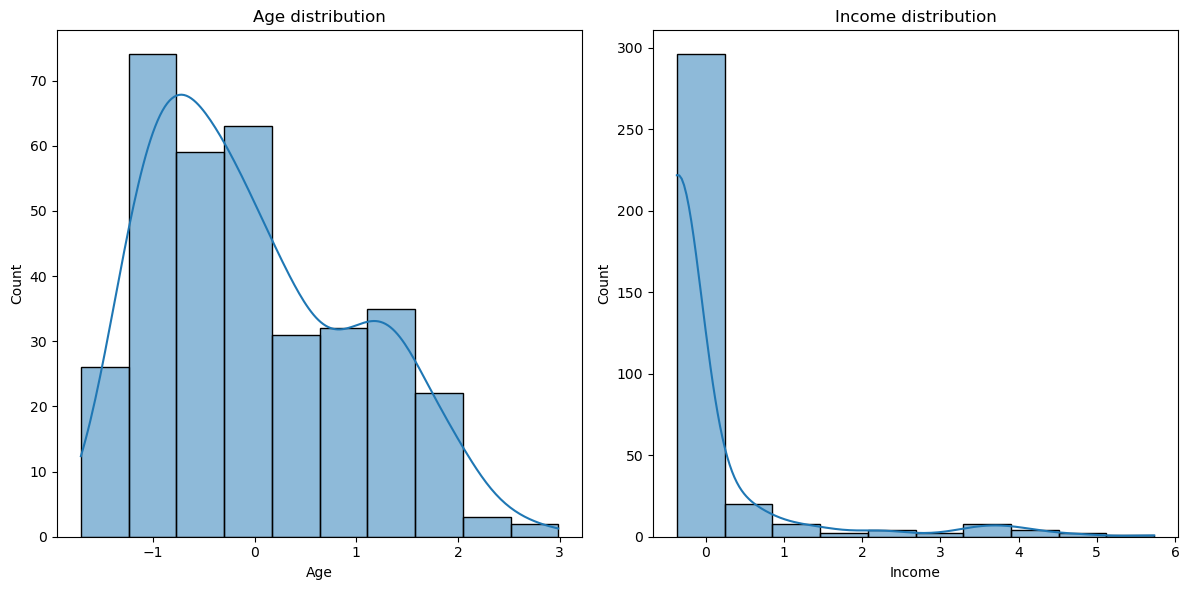

In [77]:

import matplotlib.pyplot as plt
import seaborn as sns

#1. Histograms for Numerical Variables
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)  
sns.histplot(violence['Age'], kde=True) 
plt.title('Age distribution')


plt.subplot(1, 2, 2) 
sns.histplot(violence['Income'], kde=True)
plt.title('Income distribution')

plt.tight_layout() 
plt.show()
plt.savefig('figure_Distribution.png' ,format='png', dpi=300)
plt.close()




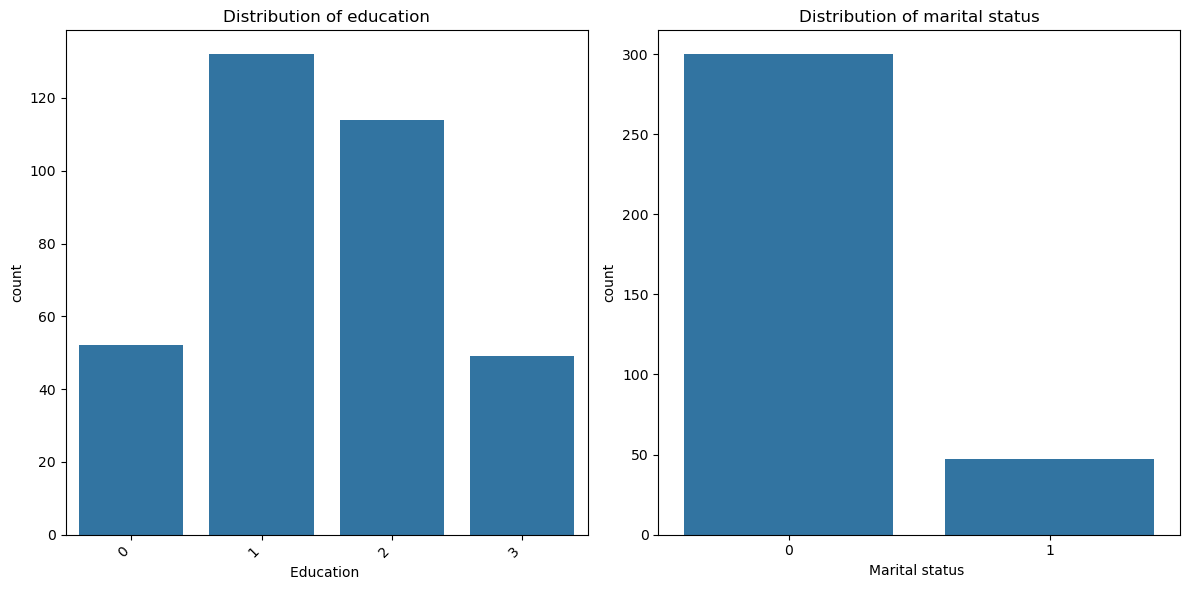

<Figure size 640x480 with 0 Axes>

In [68]:
# bar charts for categorical variables

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.countplot(x='Education ', data=violence)
plt.title('Distribution of education')
plt.xticks(rotation=45, ha='right') 


plt.subplot(1, 2, 2)
sns.countplot(x='Marital status ', data=violence)
plt.title('Distribution of marital status')

plt.tight_layout()
plt.show()
plt.savefig('figure2_Distribution.png') 




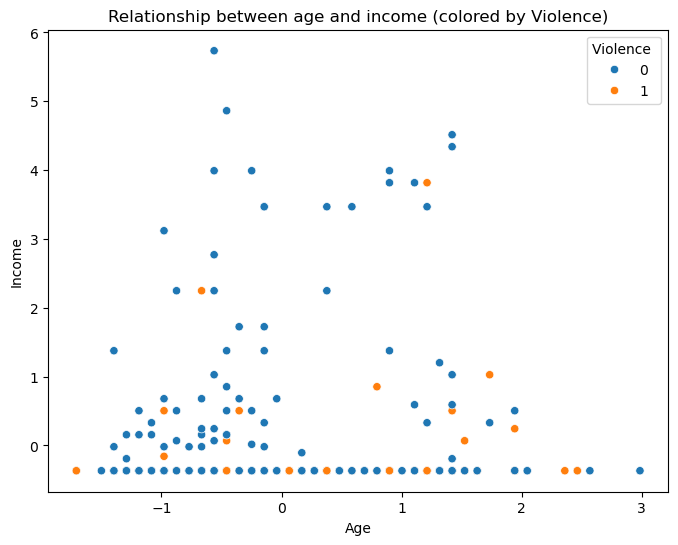

<Figure size 640x480 with 0 Axes>

In [69]:
# Scatter plot to visualize the relationship between two numeric variables

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', hue='Violence ', data=violence)  
plt.title('Relationship between age and income (colored by Violence)')
plt.show()
plt.savefig('figure_scatterPlot.png') 

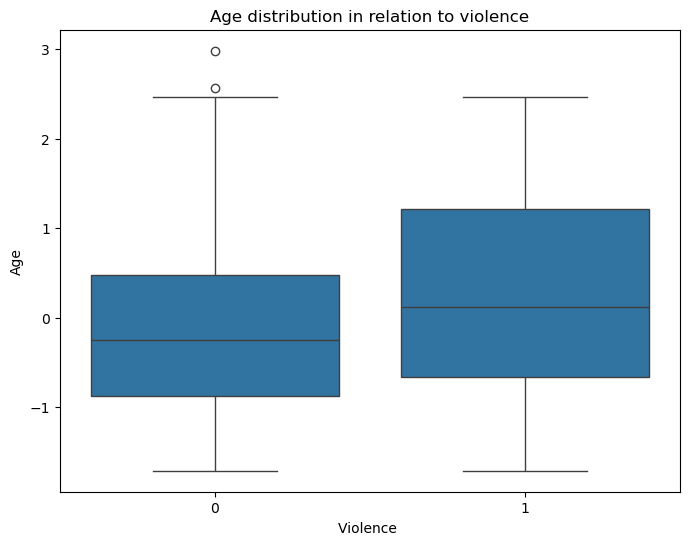

<Figure size 640x480 with 0 Axes>

In [70]:
# compare distributions of a numeric variable by category

plt.figure(figsize=(8, 6))
sns.boxplot(x='Violence ', y='Age', data=violence)
plt.title('Age distribution in relation to violence')
plt.show()
plt.savefig('figure_barplot.png') 

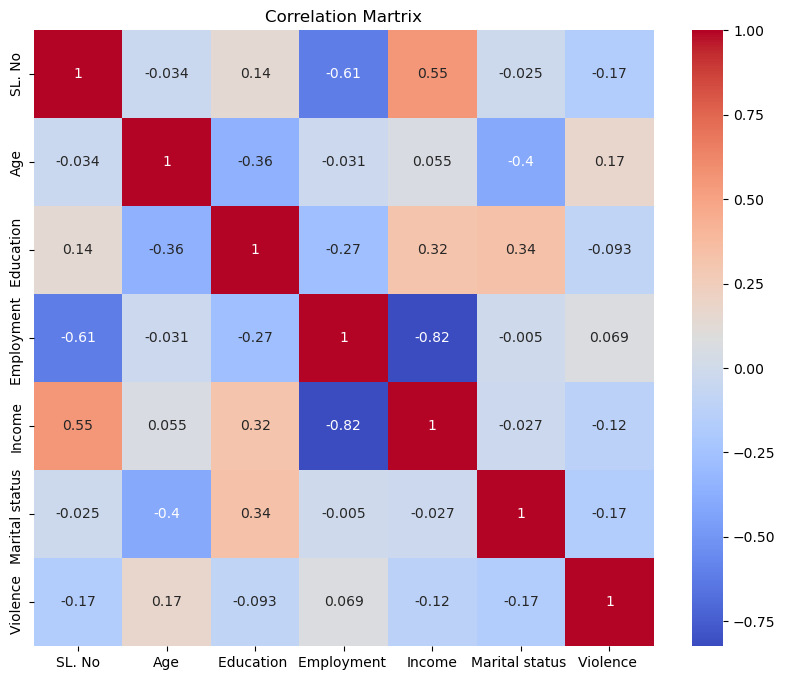

<Figure size 640x480 with 0 Axes>

In [71]:
correlation_matrix = violence.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Martrix')
plt.show()
plt.savefig('figure_correlationMatrix.png') 

In [72]:
import plotly.express as px
import numpy as np
import os

## Correlation between education level and domestic violence

In [73]:
cor1 = violence.groupby('Education ')['Violence '].value_counts()
cor_yes= cor1.reset_index(name='Count')
cor_yes = cor_yes.rename(columns={'Count': 'Violence Count'})
cor_yes['Total Violence per Education'] = cor_yes.groupby('Education ')['Violence Count'].transform('sum')
cor_yes['Percentage by Education'] = (cor_yes['Violence Count'] * 100 / cor_yes['Total Violence per Education']).round(2)
display(cor_yes)


fig = px.scatter(
    cor_yes,
    x = 'Education ',
    y = 'Percentage by Education',
    color = 'Violence ',
    title = 'Correlation between education level and violence',
    height = 500,
    width = 700
)


,Education,Violence,Violence Count,Total Violence per Education,Percentage by Education
0,0,0,41,52,78.85
1,0,1,11,52,21.15
2,1,0,86,132,65.15
3,1,1,46,132,34.85
4,2,0,94,114,82.46
5,2,1,20,114,17.54
6,3,0,40,49,81.63
7,3,1,9,49,18.37


# ## Correlation between education level and domestic violence

In [74]:
cor2 = violence.groupby('Employment ')['Violence '].value_counts().reset_index()
cor2 = cor2.rename(columns={'count': 'Violence Count'})
cor2['Total'] = cor2.groupby('Employment ')['Violence Count'].transform('sum')
cor2['Percentage'] = (cor2['Violence Count'] * 100 / cor2['Total']).round(2)
display(cor2)

fig = px.scatter(
    cor2,
    x = 'Employment ',
    y = 'Percentage',
    color = 'Violence ',
    title = 'Correlation between education level and violence',
    height = 500,
    width = 700
)





,Employment,Violence,Violence Count,Total,Percentage
0,0,0,18,23,78.26
1,0,1,5,23,21.74
2,1,0,2,3,66.67
3,1,1,1,3,33.33
4,2,0,42,47,89.36
5,2,1,5,47,10.64
6,3,0,199,274,72.63
7,3,1,75,274,27.37
